In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
salary_data = pd.read_csv("Salary Prediction of Data Professions.csv")

In [3]:
salary_data.head(5)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


# Data Cleaning and EDA


In [4]:
data = salary_data[salary_data.columns[2:]]
data = data.dropna().reset_index()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2632 non-null   int64  
 1   SEX               2632 non-null   object 
 2   DOJ               2632 non-null   object 
 3   CURRENT DATE      2632 non-null   object 
 4   DESIGNATION       2632 non-null   object 
 5   AGE               2632 non-null   float64
 6   SALARY            2632 non-null   int64  
 7   UNIT              2632 non-null   object 
 8   LEAVES USED       2632 non-null   float64
 9   LEAVES REMAINING  2632 non-null   float64
 10  RATINGS           2632 non-null   float64
 11  PAST EXP          2632 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 246.9+ KB


In [5]:
data.head()

,index,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,5,F,2-19-2013,01-07-2016,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0
4,6,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0


In [6]:
# Tasks
#-------Visualization----------#
# visualize the average salary of each designation
# ------Analysis-------#
# Which designation and unit offers the highest salary compensation?
# Does the years of prior experience play a significant role for future salaries?
# Which job position is the most desired?(bar chart comparison)
# How does gender affect the employee's salary earnings?
# What is the relationship between an employees years of experience at a company and his salary? 
# What is the relationship between an employees years of experience in an industry and his salary? 
# What does the number of leaves taken say about the employees satisfaction with his role?

In [7]:
designations = data["DESIGNATION"]
designations = designations.unique()
units = data["UNIT"]
units = units.unique()

In [8]:
designations

array(['Analyst', 'Senior Analyst', 'Associate', 'Senior Manager',
       'Manager', 'Director'], dtype=object)

In [9]:
units

array(['Finance', 'IT', 'Marketing', 'Operations', 'Web', 'Management'],
      dtype=object)

In [10]:
data["DOJ"] = pd.to_datetime(data["DOJ"])
data["CURRENT DATE"] = pd.to_datetime(data["CURRENT DATE"])
data = data.drop("index", axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEX               2632 non-null   object        
 1   DOJ               2632 non-null   datetime64[ns]
 2   CURRENT DATE      2632 non-null   datetime64[ns]
 3   DESIGNATION       2632 non-null   object        
 4   AGE               2632 non-null   float64       
 5   SALARY            2632 non-null   int64         
 6   UNIT              2632 non-null   object        
 7   LEAVES USED       2632 non-null   float64       
 8   LEAVES REMAINING  2632 non-null   float64       
 9   RATINGS           2632 non-null   float64       
 10  PAST EXP          2632 non-null   int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 226.3+ KB


In [12]:
data["Work Duration"] = data["CURRENT DATE"].dt.year - data["DOJ"].dt.year

In [13]:
data.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Work Duration
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2
1,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2
2,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,3
3,F,2013-02-19,2016-01-07,Analyst,22.0,48736,Marketing,20.0,10.0,4.0,0,3
4,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,3


# Visualize the average salary of each designation


In [14]:
# Convert leaves used and remaining to a new column that instead captures the percentage leaves used

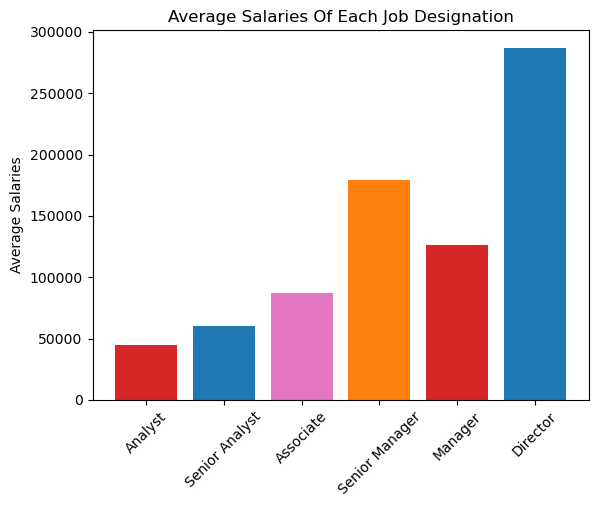

In [51]:
# data.query(f'DESIGNATION == "{designations[0]}" & UNIT == "{units[0]}"')
average_salaries = []

for i in range(len(designations)):
    designation = data.query(f'DESIGNATION == "{designations[i]}"')
    salaries = designation["SALARY"]
    average_salary = salaries.mean().round()
    average_salaries.append(average_salary)

# Bar chart Visualization
fig, ax = plt.subplots()
bar_colors = ["tab:red", "tab:blue", "tab:pink", "tab:orange"]
ax.bar(designations, average_salaries, color=bar_colors)
ax.set_ylabel("Average Salaries")
ax.set_title("Average Salaries Of Each Job Designation")
ax.tick_params(axis="x", rotation=45)